# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohla být korelace (dvojice typu Age upon Intake a Age upon Outcome neuznáváme) a popište jejich vztah pomocí bivariačních deskriptivních statistik. 
есть в 4 преднашке 

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Income Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

In [1]:
# a teď už je to na vás 💪
# níže vložte své řešení

In [2]:
import numpy as np
import pandas as pd
from pandas import factorize
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Nastavil jsem styly pro seaborn

In [3]:
sns.set_style("darkgrid")
# palette = sns.color_palette("hls", 10) DEL
# sns.color_palette("rocket", as_cmap=True)
palette = sns.color_palette("flare")
sns.set_palette(palette)

Načtu data ze souboru, podívám se na jejich charakteristiky, počet řádků a sloupců, názvy příznaků, způsob označení chybějících údajů.

In [4]:
df = pd.read_csv('intakes.csv')
print(df.shape)
df

(138585, 12)


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
...,...,...,...,...,...,...,...,...,...,...,...,...
138580,A856010,Snow,04/27/2022 07:54:00 AM,April 2022,4434 Frontier Trail in Austin (TX),Owner Surrender,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair,White
138581,A855811,A855811,04/23/2022 01:32:00 PM,April 2022,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,Labrador Retriever Mix,Brown Brindle/Black
138582,A855815,A855815,04/23/2022 01:32:00 PM,April 2022,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,Intact Female,2 months,Labrador Retriever Mix,Brown/Black
138583,A855818,*Pumbaa,04/23/2022 02:44:00 PM,April 2022,10827 Fm 1820 in Travis (TX),Stray,Normal,Dog,Intact Male,3 years,Anatol Shepherd/German Shepherd,Brown


Dataset obsahuje 12 příznaků:
* Animal ID - id zvířete
* Name - jméno zvířete
* DateTime - datum nálezu zvířete (ve formátu měsíc/den/rok a přesný čas)
* MonthYear - datum nálezu zvířete (ve formátu měsíc a rok)
* Found Location -  adresu místa, kde bylo zvíře nalezeno (ve formátu index, ulice, město, stát)
* Intake Type - parametr popisující, zda zvíře opuštěné (Abadoned), zatoulané (Stray), je volně žijící (Wildfire), předané majitelem (Owner Surrender), bude vyžadovat eutanazii (Euthanasia Request) nebo bylo nalezeno s pomocí veřejnosti (Public Assist)
* Intake Condition - stav zvířete v momentě nálezu (Normal, Sick, Injured, Aged, Nursing, Pregnant...)
* Animal Type - druh zvířete 
* Sex upon Intake - pohlaví při příjmu s uvedením, zda je či není kastrované (Intact Male/Female, Neutered Male, Spayed Female,Unknown)
* Age upon Intake - věk zvířete v momentě nálezu (in weeks)
* Breed - plemeno zvířete
* Color - barva zvířete

Hledám unikátní hodnoty příznaků, abych zjistil, zda jsou data kategorická, nebo ne.

In [5]:
df['Intake Type'].unique()

array(['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request', 'Abandoned'], dtype=object)

In [6]:
df['Intake Condition'].unique()

array(['Normal', 'Sick', 'Injured', 'Pregnant', 'Nursing', 'Aged',
       'Medical', 'Other', 'Neonatal', 'Feral', 'Behavior', 'Med Urgent',
       'Space', 'Med Attn', 'Panleuk'], dtype=object)

In [7]:
df['Animal Type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

In [8]:
df['Sex upon Intake'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

Zajímavé je, že zde existují dva formáty pro neznámé hodnoty pro nastavené hodnoty, níže zkontroluji, kolikrát se hodnota NAN objeví v položce Sex upon Intake.

In [9]:
df[df['Sex upon Intake'] == np.nan]
# protože jsem nedostal ani jeden řádek s hodnotou NAN, může to být chyba.

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color


Všechny kontrolované příznaky odpovídají kategorickému datovému typu.

Aktuální datové typy příznaků.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Name má mnoho chybějících hodnot, které jsou označeny NAN.

Nyní provedu totéž s daty ze souboru 'outcomes.csv'.

In [11]:
df_out = pd.read_csv('outcomes.csv')
print(df_out.shape)
df_out

(138769, 12)


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
...,...,...,...,...,...,...,...,...,...,...,...,...
138764,A855717,NaN,04/26/2022 05:15:00 PM,Apr 2022,01/26/2022,Adoption,NaN,Cat,Neutered Male,2 months,Maine Coon,Blue
138765,A855721,Isis,04/26/2022 06:07:00 PM,Apr 2022,01/07/2022,Adoption,NaN,Dog,Spayed Female,3 months,Catahoula,Brown Merle/White
138766,A855973,A855973,04/26/2022 06:41:00 PM,Apr 2022,04/24/2022,Transfer,Partner,Cat,Intact Female,2 days,Domestic Shorthair,Cream Tabby
138767,A547142,Foxy,04/26/2022 06:04:00 PM,Apr 2022,06/19/2006,Transfer,Partner,Dog,Spayed Female,15 years,Pomeranian,Tan


Dataset obsahuje 12 příznaků: Ch_
* Animal ID - id zvířete
* Name - jméno zvířete
* DateTime - datum nálezu zvířete (ve formátu měsíc/den/rok a přesný čas)
* MonthYear - datum nálezu zvířete (ve formátu měsíc a rok)
* Found Location -  adresu místa, kde bylo zvíře nalezeno (ve formátu index, ulice, město, stát)
* Intake Type - parametr popisující, zda zvíře opuštěné (Abadoned), zatoulané (Stray), je volně žijící (Wildfire), předané majitelem (Owner Surrender), bude vyžadovat eutanazii (Euthanasia Request) nebo bylo nalezeno s pomocí veřejnosti (Public Assist)
* Intake Condition - stav zvířete v momentě nálezu (Normal, Sick, Injured, Aged, Nursing, Pregnant...)
* Animal Type - druh zvířete 
* Sex upon Intake - pohlaví při příjmu s uvedením, zda je či není kastrované (Intact Male/Female, Neutered Male, Spayed Female,Unknown)
* Age upon Intake - věk zvířete v momentě nálezu (in weeks)
* Breed - plemeno zvířete
* Color - barva zvířete

Now i want to find all все значения которые могут встретися в колонках, чтобы в дальнейшем понять какой это тип категор или дист. Так же посмотреть как называются неизвестные значения в колонках. 

In [12]:
df_out['Outcome Subtype'].unique()

array([nan, 'Partner', 'Foster', 'SCRP', 'Out State', 'Suffering',
       'Underage', 'Snr', 'Rabies Risk', 'In Kennel', 'Offsite',
       'Aggressive', 'Enroute', 'At Vet', 'In Foster', 'Behavior',
       'Medical', 'Field', 'Possible Theft', 'Barn', 'Customer S',
       'Court/Investigation', 'Emer', 'In Surgery', 'Prc', 'Emergency',
       'In State'], dtype=object)

In [13]:
df_out['Animal Type'].unique()

array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

In [14]:
df_out['Outcome Type'].unique()

array(['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer',
       'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate', nan],
      dtype=object)

In [15]:
df_out['Sex upon Outcome'].unique()

array(['Neutered Male', 'Unknown', 'Intact Male', 'Spayed Female',
       'Intact Female', nan], dtype=object)

Zdá se, že všechny příznaky kromě DateTime, MonthYear a Age upon Outcome jsou kategorické, stejně jako u df.

In [16]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Práce s daty

Odstranění duplicit z datových frejimů

In [17]:
df = df.drop_duplicates()
df_out = df_out.drop_duplicates()

In [18]:
#  Udělal jsem to, abych nahradil prázdné buňky NAN, ale pak jsem si všiml,
#  že všechny prázdné buňky se počítají jako NAN.
# df['Name'] = df['Name'].replace(r'^\s*$', np.nan, regex=True)
# df_out['Name']=df_out['Name'].replace(r'^\s*$', np.nan, regex=True)
# now all empty names are set to NaN

Převedu příznak Age upon Intake na číselný datový typ, rozpoznám formát, ve kterém je věk uveden (dny, měsíce, roky, týdny), a převedu tyto hodnoty na ekvivalentní počet v týdnech a opravuji nesprávné hodnoty (záporné hodnoty). Formát (float64) jsem zvolil tak, aby se neztratila přesnost informací.

In [19]:
for age in df['Age upon Intake']:
    if (type(age) is float ):
        continue
    else: 
        num = float(age[:2])
        # take abs if it is negative
        if num < 0:
            num = -num
        elif num == 0.0:
            df['Age upon Intake'].replace(age, np.nan, inplace=True)
            continue
        if (age[2:] == "year") or (age[2:] == " years" or "years"):
            df['Age upon Intake'].replace(age, num*52.18, inplace=True)
        elif ((age[2:] ==" months" or "months") or (age[2:] =="month") ):
            df['Age upon Intake'].replace(age, num*4.348, inplace=True)
        elif ((age[2:] =="days"or " days") or (age[2:] =="day") ):
            df['Age upon Intake'].replace(age, num/7, inplace=True)
        elif (age[2:] ==" weeks" or "weeks") or (age[2:] =="week"):
            df['Age upon Intake'].replace(age, num, inplace=True)
            
print(df['Age upon Intake'])

C:\Users\user\AppData\Local\Temp\ipykernel_14140\3528038608.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age upon Intake'].replace(age, num*52.18, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14140\3528038608.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age upon Intake'].replace(age, np.nan, inplace=True)


0         104.36
1         417.44
2         573.98
3         208.72
4         208.72
           ...  
138580    208.72
138581    104.36
138582    104.36
138583    156.54
138584    469.62
Name: Age upon Intake, Length: 138565, dtype: float64


Udělám to samé pro Age upon Outcome

In [20]:
for age in df_out['Age upon Outcome']:
    if (type(age) is float ):
        continue
    else: 
        num = float(age[:2])
        # take abs if it is negative
        if num < 0:
            num = -num
        elif num == 0.0:
            df_out['Age upon Outcome'].replace(age, np.nan, inplace=True)
            continue
        if ((age[2:] == "year") or (age[2:] == " years" or "years")):
            df_out['Age upon Outcome'].replace(age, num*52.18, inplace=True)
        elif ((age[2:] ==" months" or "months") or (age[2:] =="month") ):
            df_out['Age upon Outcome'].replace(age, num*4.348, inplace=True)
        elif ((age[2:] =="days"or " days") or (age[2:] =="day") ):
            df_out['Age upon Outcome'].replace(age, num/7, inplace=True)
        elif ((age[2:] ==" weeks" or "weeks") or (age[2:] =="week")):
            df_out['Age upon Outcome'].replace(age, num, inplace=True)
            
print(df_out['Age upon Outcome'])

C:\Users\user\AppData\Local\Temp\ipykernel_14140\1580734056.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['Age upon Outcome'].replace(age, num*52.18, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14140\1580734056.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['Age upon Outcome'].replace(age, np.nan, inplace=True)


0         104.36
1          52.18
2          52.18
3         208.72
4         313.08
           ...  
138764    104.36
138765    156.54
138766    104.36
138767    782.70
138768     52.18
Name: Age upon Outcome, Length: 138752, dtype: float64


Měním datový typ sloupců.

In [21]:
df.loc['Age upon Intake'] = pd.to_numeric(df["Age upon Intake"])
df_out.loc['Age upon Outcome'] = pd.to_numeric(df_out["Age upon Outcome"])

C:\Users\user\AppData\Local\Temp\ipykernel_14140\1317176494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['Age upon Intake'] = pd.to_numeric(df["Age upon Intake"])
C:\Users\user\AppData\Local\Temp\ipykernel_14140\1317176494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.loc['Age upon Outcome'] = pd.to_numeric(df_out["Age upon Outcome"])


Měním názvy, aby byly konkrétnější.

In [22]:
df.rename({'Age upon Intake': 'Age upon Intake in weeks'}, axis='columns')
df_out.rename({'Age upon Outcome': 'Age upon Outcome in weeks'}, axis='columns')

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome in weeks,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,104.36,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,52.18,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,52.18,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,208.72,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,313.08,Domestic Shorthair Mix,Orange Tabby
...,...,...,...,...,...,...,...,...,...,...,...,...
138765,A855721,Isis,04/26/2022 06:07:00 PM,Apr 2022,01/07/2022,Adoption,NaN,Dog,Spayed Female,156.54,Catahoula,Brown Merle/White
138766,A855973,A855973,04/26/2022 06:41:00 PM,Apr 2022,04/24/2022,Transfer,Partner,Cat,Intact Female,104.36,Domestic Shorthair,Cream Tabby
138767,A547142,Foxy,04/26/2022 06:04:00 PM,Apr 2022,06/19/2006,Transfer,Partner,Dog,Spayed Female,782.70,Pomeranian,Tan
138768,A855426,*Barbossa,04/26/2022 06:41:00 PM,Apr 2022,03/18/2022,Transfer,Partner,Cat,Intact Male,52.18,Domestic Shorthair,White


Nyní mám všechny data v části 'Age upon Intake/Outcome' číselné a představují věk v týdnech.

Převedu příznak **DateTime** na typ datetime64. Také převedu piznak **MonthYear**, aby se s ním lépe pracovalo.

In [ ]:
df['DateTime'] = pd.to_datetime(df["DateTime"])
df['MonthYear'] = pd.to_datetime(df["MonthYear"])
df_out['DateTime'] = pd.to_datetime(df_out["DateTime"])
df_out['MonthYear'] = pd.to_datetime(df_out["MonthYear"])

In [24]:
# checking that data is set correctly 
df[df["DateTime"] > pd.to_datetime('2019-07-08')] 

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
7,A844350,*Ella,2021-10-15 11:40:00,2021-10-01,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,313.08,Domestic Shorthair,Brown Tabby
9,A818975,NaN,2020-06-18 14:53:00,2020-06-01,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,208.72,Domestic Shorthair,Cream Tabby
22,A831808,NaN,2021-04-02 11:16:00,2021-04-01,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,52.18,Domestic Shorthair Mix,Tortie
24,A836850,NaN,2021-06-15 12:37:00,2021-06-01,6111 Softwood Drive in Austin (TX),Public Assist,Pregnant,Dog,Intact Female,208.72,Pit Bull,Blue/White
25,A754715,Rheia,2019-07-29 17:19:00,2019-07-01,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,104.36,Labrador Retriever Mix,Black/White
...,...,...,...,...,...,...,...,...,...,...,...,...
138580,A856010,Snow,2022-04-27 07:54:00,2022-04-01,4434 Frontier Trail in Austin (TX),Owner Surrender,Sick,Cat,Intact Female,208.72,Domestic Shorthair,White
138581,A855811,A855811,2022-04-23 13:32:00,2022-04-01,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,Intact Male,104.36,Labrador Retriever Mix,Brown Brindle/Black
138582,A855815,A855815,2022-04-23 13:32:00,2022-04-01,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,Intact Female,104.36,Labrador Retriever Mix,Brown/Black
138583,A855818,*Pumbaa,2022-04-23 14:44:00,2022-04-01,10827 Fm 1820 in Travis (TX),Stray,Normal,Dog,Intact Male,156.54,Anatol Shepherd/German Shepherd,Brown


Změním datové typy sloupců na typ category. Pomocí funkce unique() dříve jsem našel vhodné sloupce. 
Pro intakes.csv:

In [ ]:
df['Intake Condition']= df['Intake Condition'].astype('category')
df['Breed']= df['Breed'].astype('category')
df['Color']= df['Color'].astype('category')
df['Animal Type']= df['Animal Type'].astype('category')
df['Sex upon Intake']= df['Sex upon Intake'].astype('category')
df['Intake Type']= df['Intake Type'].astype('category')
df['Found Location']= df['Found Location'].astype('category')
df['Name']= df['Name'].astype('category')
df['Animal ID']= df['Animal ID'].astype('category')

Pro outtakes.csv (df_out):

In [ ]:
df_out['Animal ID']= df_out['Animal ID'].astype('category')
df_out['Name']= df_out['Name'].astype('category')
df_out['Animal Type']= df_out['Animal Type'].astype('category')
df_out['Sex upon Outcome']= df_out['Sex upon Outcome'].astype('category')
df_out['Outcome Type']= df_out['Outcome Type'].astype('category')
df_out['Outcome Subtype']= df_out['Outcome Subtype'].astype('category')
df_out['Breed']= df_out['Breed'].astype('category')
df_out['Color']= df_out['Color'].astype('category')

Změním datový typ data narození na datetime, aby se s ním lépe pracovalo.

In [28]:
df_out['Date of Birth'] = pd.to_datetime(df_out["Date of Birth"])  

C:\Users\user\AppData\Local\Temp\ipykernel_14140\1868639265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['Date of Birth'] = pd.to_datetime(df_out["Date of Birth"])


Zkontroluji, zda jsou typy správně nastaveny

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138566 entries, 0 to Age upon Intake
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  category      
 1   Name              97300 non-null   category      
 2   DateTime          138565 non-null  datetime64[ns]
 3   MonthYear         138565 non-null  datetime64[ns]
 4   Found Location    138565 non-null  category      
 5   Intake Type       138565 non-null  category      
 6   Intake Condition  138565 non-null  category      
 7   Animal Type       138565 non-null  category      
 8   Sex upon Intake   138564 non-null  category      
 9   Age upon Intake   137676 non-null  float64       
 10  Breed             138565 non-null  category      
 11  Color             138565 non-null  category      
dtypes: category(9), datetime64[ns](2), float64(1)
memory usage: 14.8+ MB


In [30]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138753 entries, 0 to Age upon Outcome
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138752 non-null  category      
 1   Name              97502 non-null   category      
 2   DateTime          138752 non-null  datetime64[ns]
 3   MonthYear         138752 non-null  datetime64[ns]
 4   Date of Birth     138752 non-null  datetime64[ns]
 5   Outcome Type      138729 non-null  category      
 6   Outcome Subtype   63427 non-null   category      
 7   Animal Type       138752 non-null  category      
 8   Sex upon Outcome  138751 non-null  category      
 9   Age upon Outcome  138538 non-null  float64       
 10  Breed             138752 non-null  category      
 11  Color             138752 non-null  category      
dtypes: category(8), datetime64[ns](3), float64(1)
memory usage: 12.9+ MB


**🖊️ Deskriptivní statistiky**

In [31]:
df.describe()

,Age upon Intake
count,137676.000000
mean,179.409209
std,151.149107
min,52.180000
25%,52.180000
50%,104.360000
75%,208.720000
max,1565.400000


V df existuje pouze jeden typ, který lze popsat descriptive statistikou. Descriptive statistiky obsahují statistiky, které shrnují centrální tendenci, rozptyl a tvar rozdělení souboru dat, max a min, s výjimkou hodnot NaN.

Níže analyzuji invariantní statistiky. Zjistím četnost a relativní četnost, vytvořím nový soubor dat, kde jsou uložena, vypíšu 10 nejvyšších věků, ve kterých se zvířata dostala do útulku, pro přehlednost vytvořím histogram, kdeplot, ecdfplot.

,Frequency,Relative frequency
52.18,40173,0.291794
104.36,32929,0.239177
156.54,16459,0.119549
208.72,13846,0.100569
260.90,8407,0.061064
313.08,6044,0.043900
365.26,4648,0.033760
417.44,4117,0.029904
469.62,3502,0.025437
521.80,3100,0.022517


<AxesSubplot:xlabel='Age upon Intake', ylabel='Count'>

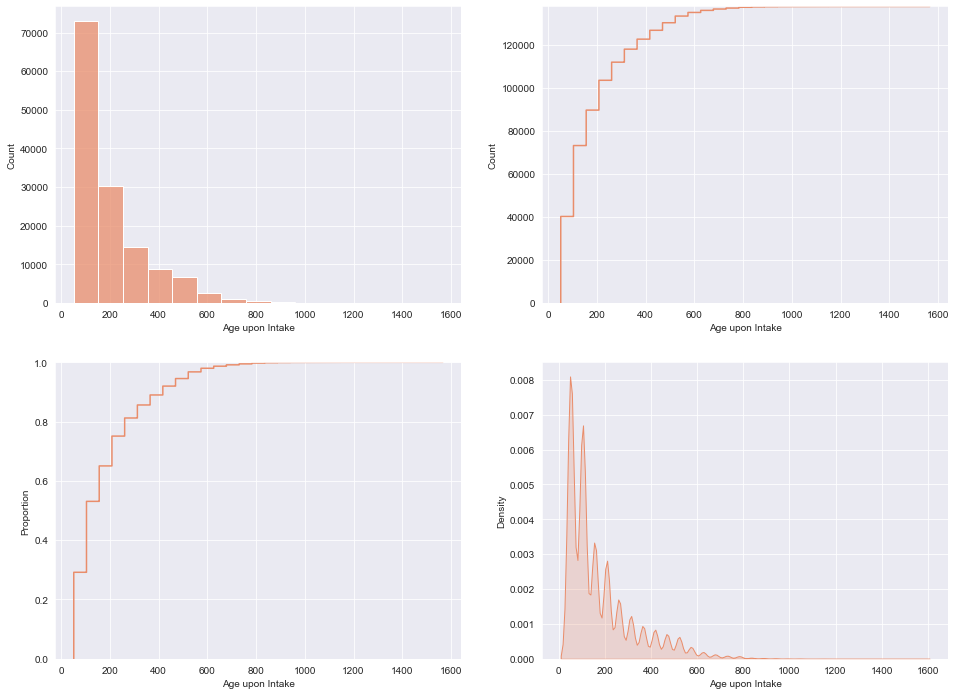

In [32]:
#  příznaky Age upon Intake
nc='Age upon Intake'

# Tohle jsem si vzal z cvičeni
stats_df = pd.DataFrame(data={
    'Frequency': df[nc].value_counts(),
    'Relative frequency': df[nc].value_counts(normalize=True)
})
display(stats_df.head(10)) 

fig, axes = plt.subplots(2, 2, figsize=(16,12))
sns.histplot(data=df, x=nc,  bins=15 ,  ax= axes[0][0] )
sns.kdeplot(data= df, x=nc, fill=True, ax= axes[1][1])
sns.ecdfplot(data=df, x=nc  ,ax= axes[1][0])
sns.ecdfplot(data=df, x=nc  ,stat='count',  ax= axes[0][1])


Z tabulky a histogramů vyplývá, že nejčastějším věkem zvířat je 52 týdnů. Největší počet zvířat je ve věku 50 až 270 týdnů.

Vytvořme nový df, ze kterého odstraním zvířata starší 800 týdnů pro lepší přehlednost.

<AxesSubplot:xlabel='Age upon Intake', ylabel='Count'>

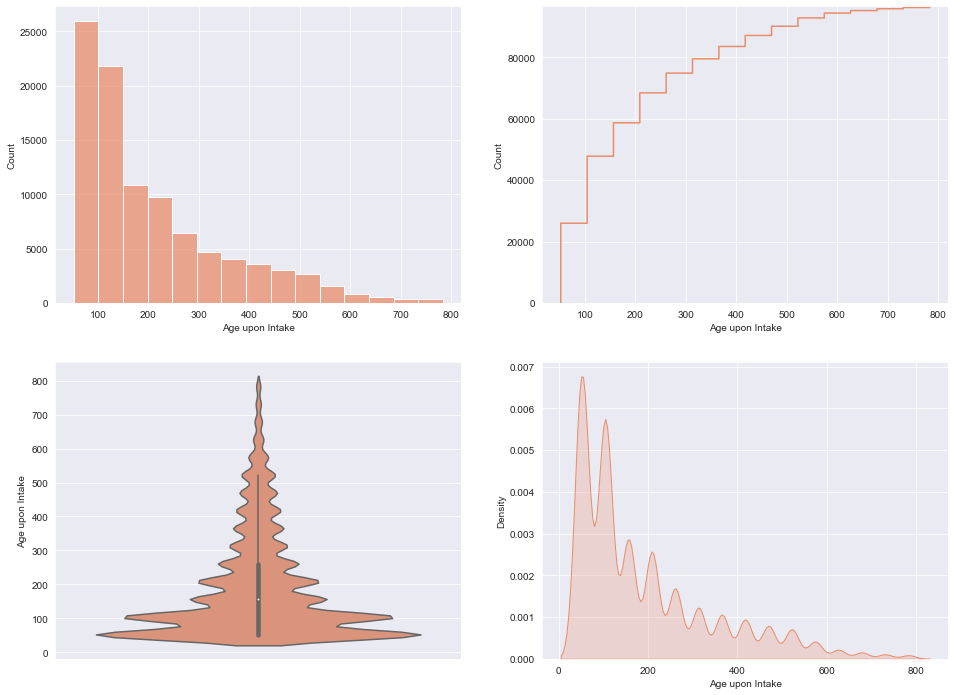

In [33]:
filtered = df[df[nc] < 800].dropna()

fig, axes = plt.subplots(2, 2, figsize=(16,12))
sns.histplot(data=filtered, x=nc,  bins=15 ,  ax= axes[0][0] )
sns.kdeplot(data=filtered, x=nc, fill=True, ax= axes[1][1])
sns.violinplot(data=filtered, y=nc, ax= axes[1][0])
# sns.ecdfplot(data=filtered, x=nc, ax= axes[1][0])
sns.ecdfplot(data=filtered, x=nc  ,stat='count',  ax= axes[0][1])

Zde můžeme vidět, jaký je poměr skupin zvířat různého věku. Největší skupina ve věku 50 až 200 týdnů zaujímá 60 % z celkového počtu.

 **DateTime**

Grafy ukazují rozložení hustoty a věku v závislosti na počtu zvířat.

Z DateTime vybírám hodnotu roku a čtvrtletí do samostatných sloupců.

In [ ]:
df['Year'] = df['DateTime'].dt.year
df['Quarter'] = df['DateTime'].dt.quarter

Spočítal jsem počet přijatých zvířat v různých obdobích a údaje jsem zapsal do samostatné tabulky. Vykreslil jsem grafy rozdělení.

,Number of found animals,Relative frequency
2014-07-09 12:58:00,63,0.000455
2016-09-23 12:00:00,63,0.000455
2017-09-01 14:47:00,59,0.000426
2014-02-19 13:51:00,49,0.000354
2016-02-14 16:02:00,45,0.000325
...,...,...
2018-01-24 01:41:00,1,0.000007
2017-03-04 11:00:00,1,0.000007
2015-07-09 18:53:00,1,0.000007
2016-12-22 10:29:00,1,0.000007


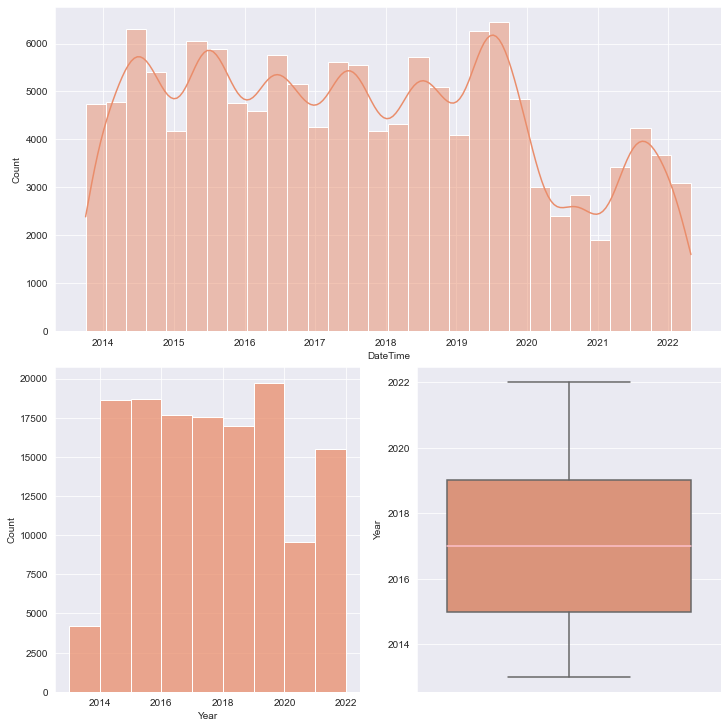

In [35]:
def u_date(df, column):
    col ='Number of found animals'
    st_df = pd.DataFrame(data={
        'Number of found animals': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True)
    })
    
    display(st_df)

    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :]) 
    ax2 = fig.add_subplot(spec[1, 0]) 
    ax3 = fig.add_subplot(spec[1, 1])
    
    sns.histplot(data=df, x=column,  kde=True, bins=30, ax=ax1)
    sns.histplot(data=df, x='Year',  bins=9 ,ax=ax2)
    sns.boxplot(data=df, y='Year', medianprops={"color": "pink"}, ax=ax3)
    
u_date(df, 'DateTime')

Vidíme, že v dnech 2014-07-09 a 2014-07-09 byl nalezen nejvyšší počet zvířat(63). Ze sloupcového grafu je vidět výrazný pokles v 1. čtvrtletí 2020, který pokračoval až do poloviny roku 2021. Předtím byl průměrný počet přijatých zvířat konzistentní, poklesy byly sezónní. Krabicový graf odráží hustotu zvířat přijatých do útulku. V letech 2015 až 2019 bylo přijato nejvíce zvířat.

Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.

1. **Animal Type** 
Ke znázornění rozdílů v počtu zvířat různých typů používám koláčový graf a histogram.

,Frequency,Relative frequency
Dog,78135,0.563887
Cat,52373,0.377967
Other,7372,0.053202
Bird,661,0.004770
Livestock,24,0.000173


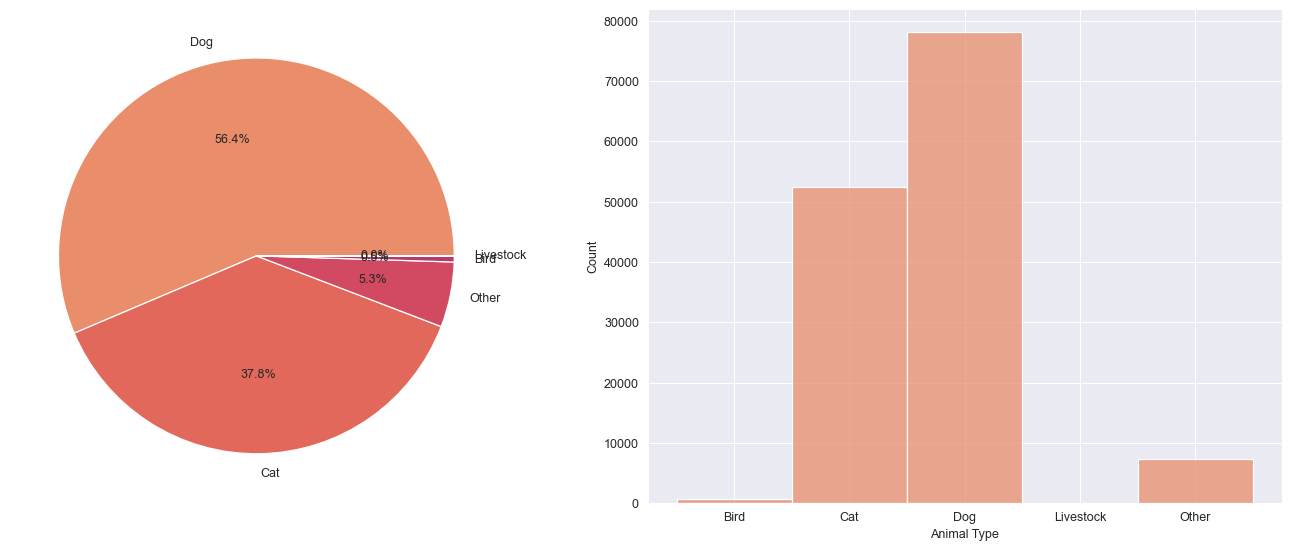

In [36]:
def univariate_categor(df, nc):
    
    st = pd.DataFrame(data={
    'Frequency': df[nc].value_counts(),
    'Relative frequency': df[nc].value_counts(normalize=True)
    })
    display(st) 
    
    fig = plt.figure(figsize=(15,6), constrained_layout=True,dpi=90)
    spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    ax1 = fig.add_subplot(spec[0, 0]) 
    ax2 = fig.add_subplot(spec[0, 1]) 

    
    ax1.pie(st['Frequency'], labels=st.index, autopct='%1.1f%%', )
    sns.histplot(data=df, x=nc, ax=ax2)

univariate_categor(df, "Animal Type")

Většina zvířat v útulcích jsou psi(56%) a kočky(37%), malé procento tvoří ostatní zvířata(5%), méně než 1 procento ptáci a hospodářská zvířata.

2. **Sex upon Intake**  
Pro znázornění rozdělení podle pohlaví se nejlépe hodí koláčový graf a histogram.

,Počet zvířat,Animal Type
Intact Male,45629,0.329299
Intact Female,43303,0.312513
Neutered Male,20835,0.150364
Spayed Female,17731,0.127963
Unknown,11066,0.079862


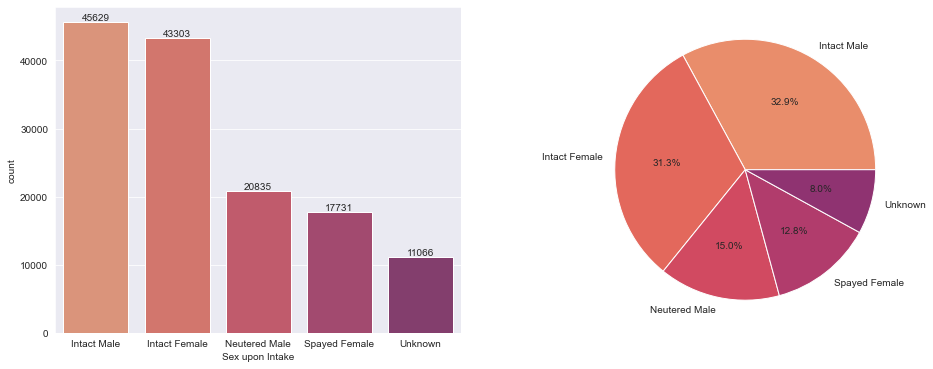

In [37]:
# Tohle jsem si vzal z cvičeni
def univariate_for_sex(df, column):
    st = pd.DataFrame(data={
        'Počet zvířat': df[column].value_counts(),
        'Animal Type': df[column].value_counts(normalize=True) 
    })
    
    display(st)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    
    sns.countplot(data=df, x=column, order = df[column].value_counts().index, ax=ax1)
    # adds labels above bars
    ax1.bar_label(ax1.containers[0])
    
    ax2.pie(st['Počet zvířat'], labels=st.index, autopct='%1.1f%%')
univariate_for_sex(df, 'Sex upon Intake')

V útulku převažují *interact male a female*, s mírně vyšším počtem *male*  v útulku. Zvířata neznámého (Unknown) pohlaví a spayed female představují menšinu.

3. **Outcome Subtype** 
Zde budu analyzovat příznak Outcome Subtype z df_out a vykreslím pro něj rozdělení(countplot).

,Frequency,Relative frequency
Partner,33595,0.529664
Foster,12540,0.197708
Rabies Risk,4056,0.063948
Suffering,3509,0.055323
SCRP,3208,0.050578
Snr,2935,0.046274
In Kennel,678,0.010689
Aggressive,570,0.008987
Offsite,457,0.007205
Out State,397,0.006259


<AxesSubplot:xlabel='count', ylabel='Outcome Subtype'>

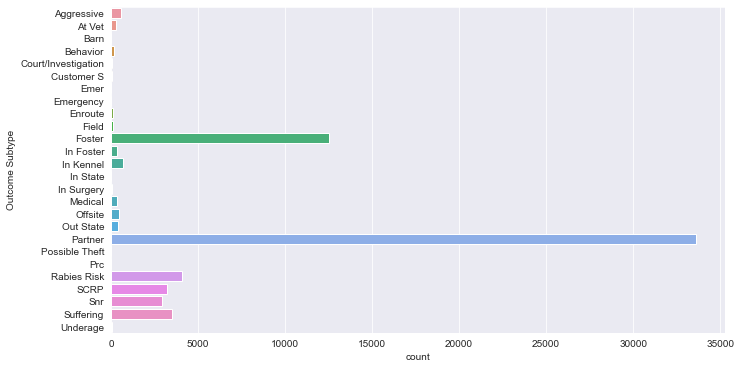

In [38]:
nc = "Outcome Subtype"
st = pd.DataFrame(data={
    'Frequency': df_out[nc].value_counts(),
    'Relative frequency': df_out[nc].value_counts(normalize=True)
    })
display(st)

plt.figure(figsize=(11,6))
sns.countplot(data=df_out,y=nc )

Vidíme, že zvířata s podtypem *Partner* opouštějí útulek v největším počtu, následují *Foster*, s přibližně stejným počtem jdou *Rabies Risk, SCRP,  Snr, Suffering*.

Pro výběr 2 příznaků najdu korelaci mezi daty.

In [39]:
dfcorr = df.corr()
dfcorr.style.background_gradient(cmap="YlGn")

,Age upon Intake,Year,Quarter
Age upon Intake,1.000000,-0.020119,0.001994
Year,-0.020119,1.000000,-0.112452
Quarter,0.001994,-0.112452,1.000000


Uvědomil jsem si, že k určení korelací potřebuji více číselných údajů, a tak jsem pomocí funkce factorize() přidal nové atributy, které reprezentují data v číselném formátu. 

In [40]:
l1, categories = factorize(df["Intake Type"])
df["Intake Type Num"] = l1
l2, categories = factorize(df["Intake Condition"])
df["Intake Condition Num"] = l2
l3, categories = factorize(df["Animal Type"])
print(categories)
df["Animal Type Num"] = l3
l4, categories = factorize(df["Sex upon Intake"])
df["Sex upon Intake Num"] = l4
l5, categories = factorize(df["Breed"])
df["Breed Num"] = l5


CategoricalIndex(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], categories=['Bird', 'Cat', 'Dog', 'Livestock', 'Other'], ordered=False, dtype='category')


C:\Users\user\AppData\Local\Temp\ipykernel_14140\2431997639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Intake Type Num"] = l1
C:\Users\user\AppData\Local\Temp\ipykernel_14140\2431997639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Intake Condition Num"] = l2
C:\Users\user\AppData\Local\Temp\ipykernel_14140\2431997639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Níže jsem vytvořil dvě tabulky (heatmap) pro vizualizaci korelace.

<AxesSubplot:>

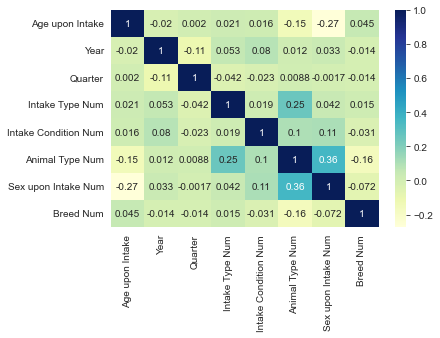

In [41]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [42]:
dfcorr = df.corr()
dfcorr.style.background_gradient(cmap="YlGn")

,Age upon Intake,Year,Quarter,Intake Type Num,Intake Condition Num,Animal Type Num,Sex upon Intake Num,Breed Num
Age upon Intake,1.000000,-0.020119,0.001994,0.021027,0.016095,-0.148797,-0.273536,0.045232
Year,-0.020119,1.000000,-0.112452,0.053472,0.079814,0.011922,0.032597,-0.013592
Quarter,0.001994,-0.112452,1.000000,-0.041862,-0.022816,0.008771,-0.001701,-0.014242
Intake Type Num,0.021027,0.053472,-0.041862,1.000000,0.019207,0.254790,0.042339,0.015135
Intake Condition Num,0.016095,0.079814,-0.022816,0.019207,1.000000,0.102656,0.105280,-0.030778
Animal Type Num,-0.148797,0.011922,0.008771,0.254790,0.102656,1.000000,0.357842,-0.159181
Sex upon Intake Num,-0.273536,0.032597,-0.001701,0.042339,0.105280,0.357842,1.000000,-0.072156
Breed Num,0.045232,-0.013592,-0.014242,0.015135,-0.030778,-0.159181,-0.072156,1.000000


Vidíme, že nejvyšší korelace mezi Animal Type a Sex upon Intake (0.35). To je poměrně malý počet. Data v df mají mezi sebou nízkou korelaci.

<AxesSubplot:xlabel='Animal Type Num', ylabel='Sex upon Intake'>

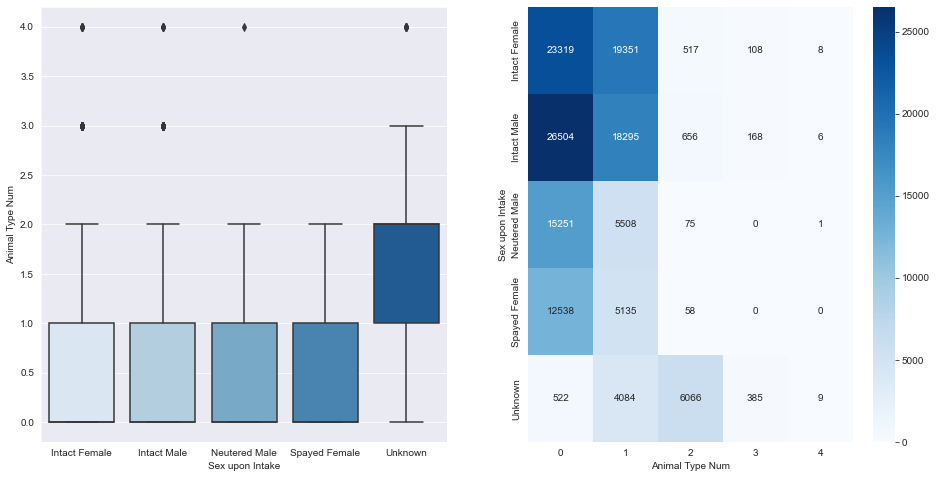

In [43]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8))
frequency_table = pd.crosstab( df["Sex upon Intake"], df["Animal Type Num"])
sns.boxplot(data=df, y='Animal Type Num', x='Sex upon Intake', palette='Blues',  ax=ax1)
sns.heatmap(frequency_table, cmap='Blues', annot=True, fmt='g', ax=ax2)

Na číselné ose y je uveden typ zvířete, na ose x je uvedeno pohlaví zvířete. Z grafu vyplývá, že většina zvířat všech typů je 0 - psi a 1 - kočky, u velkého počtu ostatních typů zvířat není pohlaví známo. Většina psů a koček s pohlavím Interact male a female

**❓ Zadané otázky** 

1. Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Income Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.

Odstraňuji zvířata, která se v tabulce objevují více než jednou se stejným ID.

In [44]:
# del dup id
ndf = df[~df.duplicated(subset=['Animal ID'], keep=False)]
ndf_out = df_out[~df_out.duplicated(subset=['Animal ID'], keep=False)]

Pro nalezení odpovědi na otázku použiji funkci 'crosstab', která sloučí data do nového df, kde je přímo vidět, kolik zvířat bylo adoptováno a k jakému typu patřilo.

<AxesSubplot:xlabel='Outcome Type', ylabel='Intake Type'>

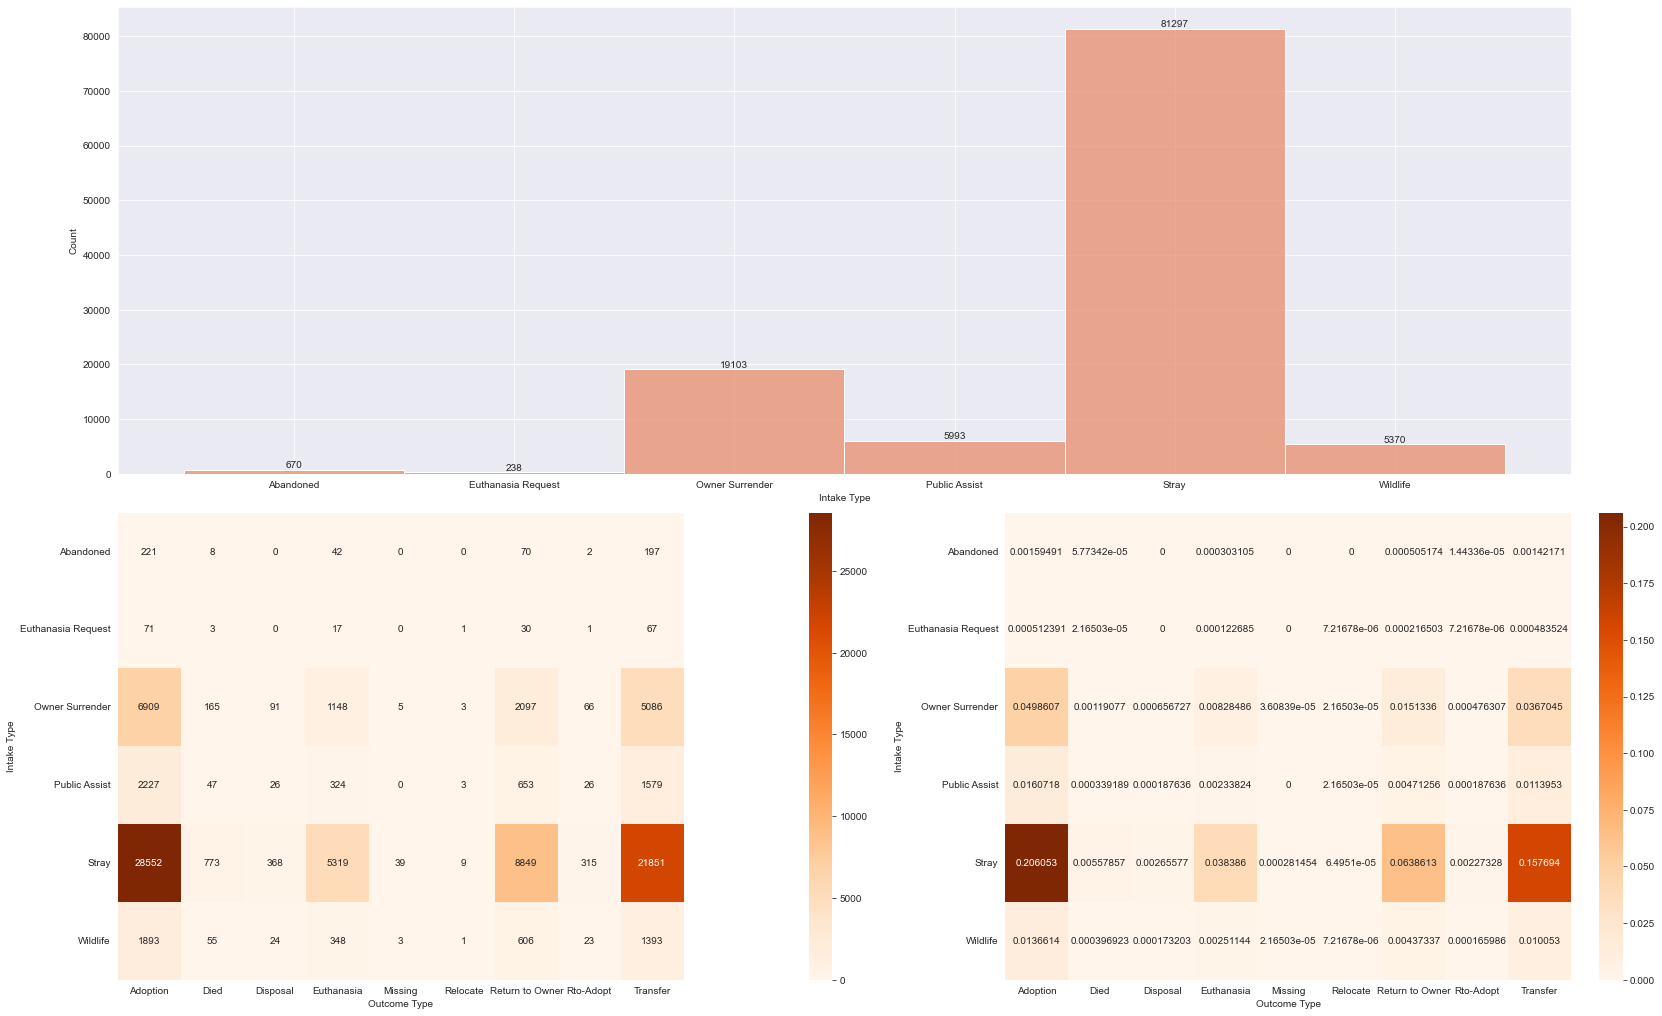

In [45]:
# bivariate descriptive statistics
c1 = "Intake Type"
c2 = "Outcome Type"

new_df = pd.crosstab(ndf[c1], ndf_out[c2])
# fig, (ax1, ax2, ax3) = plt.subplots(2, 1, figsize=(27,10))
fig = plt.figure(figsize=(23,14), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec[0, :]) 
ax2 = fig.add_subplot(spec[1, 0]) 
ax3 = fig.add_subplot(spec[1, 1])

pl = sns.histplot(data=ndf,x="Intake Type", ax=ax1 )
pl.bar_label(pl.containers[0])

sns.heatmap(new_df,  cmap="Oranges", annot=True,fmt='g', ax=ax2)
sns.heatmap(new_df.div(len(df)),  cmap="Oranges", annot=True, fmt='g', ax=ax3)

Z grafů je vidět silnou korelaci, stray zvířata jsou adoptována ve 20 % případů, téměř 5 % adopcí připadá na zvířata darovaná, téměř žádná adopce se netýká zvířat, která potřebují eutanazii. Také 6% se Stray vrátilo, což znamená, že je majitelé našli. Pokud jde o transfer, nejvýznamnější jsou stray a owner surrender. Pokud se ale podíváme na histogram, vidíme, že stray je asi 4 krát více než owner  surrender, takže nemůžeme říci, že odchod typu zvířete z útulku (Outcome Type) na typu příchodu (Income Type) nezávisí. To potvrzuje, že počet wildfire a public assist je téměř stejný, a přesto se jejich typy (Outcome Type) příliš neliší.   

2. Hraje věk zvířete roli při adopci?

Nejprve se chci podívat na celkový obraz typu v závislosti na věku pomocí box a violin plotu a pochopit, kolik zvířat je v každé věkové kategorii pomocí histogramu.

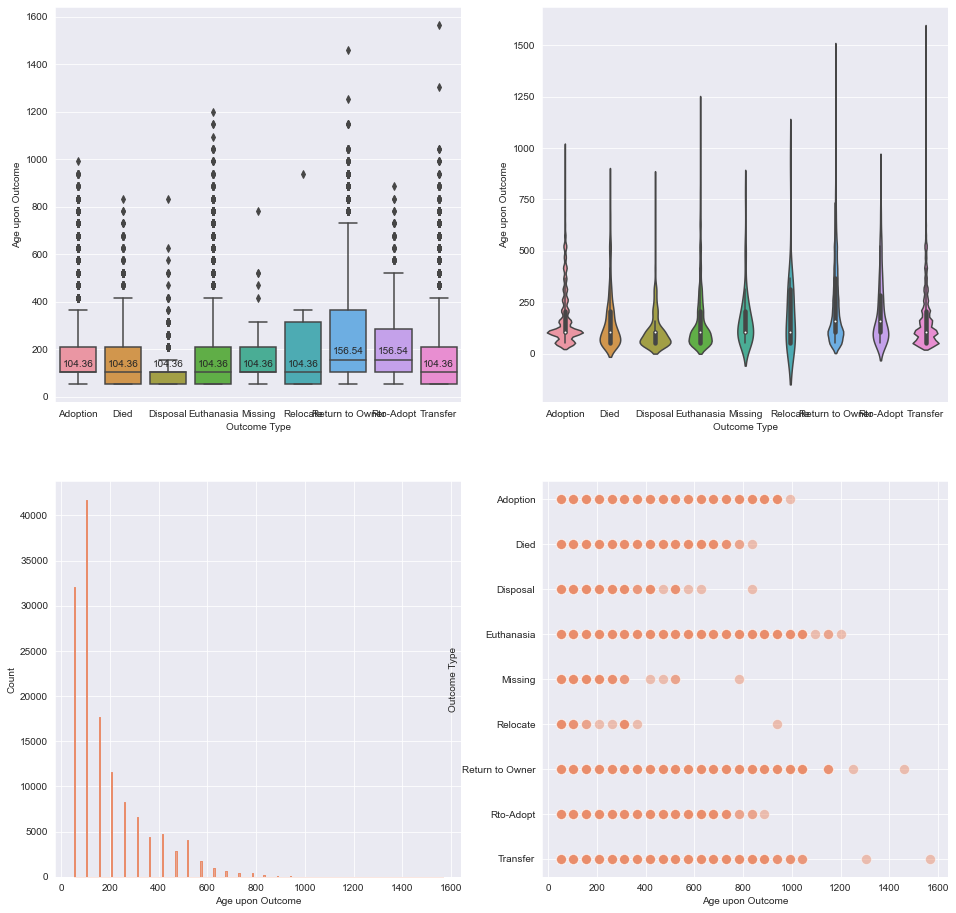

In [46]:
# bivariate descriptive statistics 

def bivariate(df, categorical, continuous):

    fig, axes = plt.subplots(2, 2, figsize=(16,16))
    # took it from eda_heart_attack
    box_plot = sns.boxplot(data=df, x=categorical, y=continuous, ax=axes[0][0])
    medians = df.groupby(categorical)[continuous].median()

    # offset from median for display
    vertical_offset = df[continuous].max() * 0.015

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], horizontalalignment='center')
    
    
    sns.histplot(data=df, x=continuous,  element='step', ax=axes[1][0])
    sns.violinplot(data=df, x=categorical, y=continuous, ax=axes[0][1])
    sns.scatterplot(data=df, y= "Outcome Type",x="Age upon Outcome", s=100, alpha=.5, ax=axes[1][1])
    
  
bivariate(df_out,"Outcome Type", "Age upon Outcome")

Medián věku adoptovaných zvířat je 104 týdnů, na box a violin grafu vidíme silnou hustotu rozložení od 100 do 200 týdnů, což naznačuje i barevná intenzita bodů v scatter plotu. Tento vztah vysvětlím podrobněji níže.

Přidám novou položku pro zvířata, která jsou adoptovaná, budou mít hodnotu 1 , ostatní 0.

In [47]:
df_out.loc[df_out["Outcome Type"] == "Adoption", "Is Adopted"] = 1
df_out.loc[df_out["Outcome Type"] != "Adoption", "Is Adopted"] = 0
# Sometimes the column is set to float type instead of int, so i change it myself
df_out["Is Adopted"] = pd.to_numeric(df_out["Is Adopted"], downcast='integer')

C:\Users\user\AppData\Local\Temp\ipykernel_14140\4276505629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.loc[df_out["Outcome Type"] == "Adoption", "Is Adopted"] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_14140\4276505629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out["Is Adopted"] = pd.to_numeric(df_out["Is Adopted"], downcast='integer')


<AxesSubplot:xlabel='Age upon Outcome', ylabel='Count'>

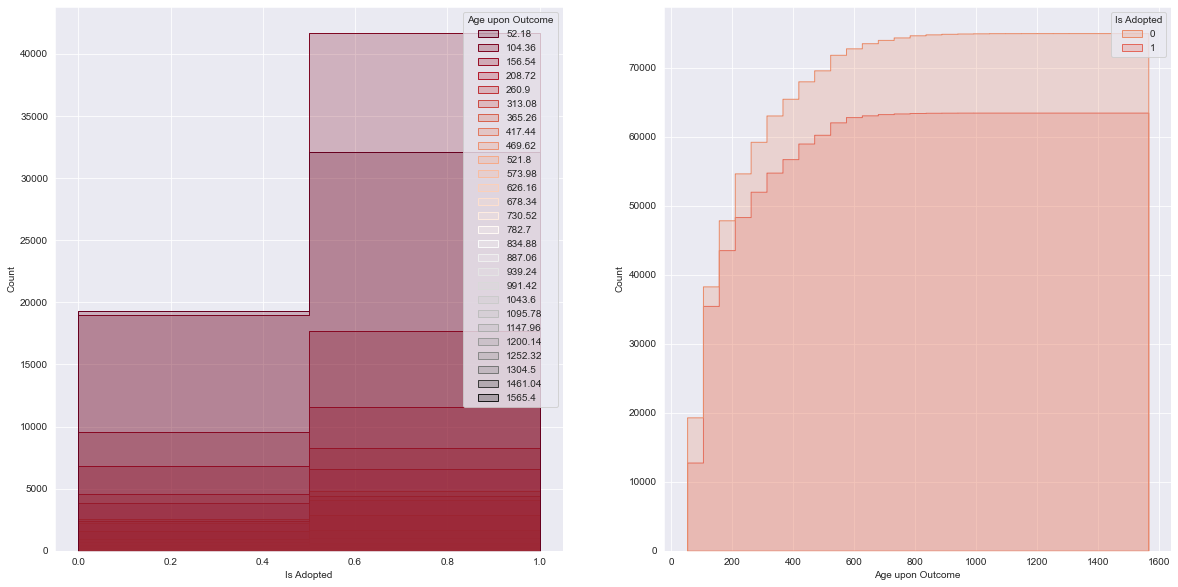

In [48]:
cat1='Is Adopted'
cat2="Age upon Outcome"

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.histplot( data=df_out, x=cat1,  element='step', palette="RdGy", binwidth=.5, hue=cat2, weights=1, ax=ax1, cumulative=True )
sns.histplot( data=df_out, x=cat2,  element='step',  binwidth=.5, hue=cat1,  weights=1, ax=ax2, cumulative=True )

* Na prvním sloupcovém grafu barva označuje věk, v pravém sloupci vidíme, že barvy označující starší zvířata, odstíny šedé a bílé se nevyskytují (po dosažení věku 600 týdnů). Nejčastěji se odebírají mladá zvířata před dosažením věku 400 týdnů, v grafu převažuje jejich vínová barva.
* Na druhém grafu vidíme, že početně nejsilnější jsou mladí jedinci do 3 let věku. U nich je rozdíl mezi krokem s neadaptovanými nejmenší - tj. podíl adaptovaných jedinců ze stejné věkové skupiny má tendenci být téměř poloviční.
* Jediná věc je, že vzhledem k tomu, že věkové skupiny mají různé počty zvířat, musíme se z toho podívat na relativní údaje.

In [49]:
df_out.groupby(["Age upon Outcome","Is Adopted"]).size()

Age upon Outcome  Is Adopted
52.18             0             19341
                  1             12791
104.36            0             18981
                  1             22700
156.54            0              9579
                  1              8086
208.72            0              6798
                  1              4793
260.90            0              4573
                  1              3667
313.08            0              3819
                  1              2773
365.26            0              2420
                  1              1957
417.44            0              2530
                  1              2257
469.62            0              1592
                  1              1267
521.80            0              2251
                  1              1804
573.98            0               936
                  1               761
626.16            0               745
                  1               255
678.34            0               478
                  1  

Ve skupině s nejvyšším počtem adoptovaných zvířat (stáří 104,36 týdne) byla adoptována více než polovina všech zvířat. Nicméně velmi mladá zvířata (52 týdnů) mají menší šanci na adopci.

Sloučil jsem dva df do jednoho velkého **big_df**, abych měl informace o zvířatech, která jsou v útulku, a o těch, která již byla adoptována, přičemž zvířata se stejným ID se vyskytují pouze jednou. Nyní u každého přijatého zvířete vím, jaký je jeho typ výstupu(Outcome type).

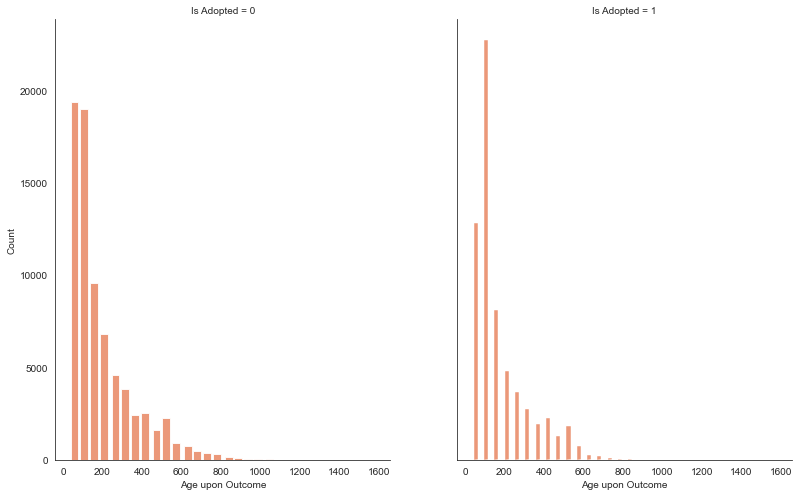

In [50]:
cat1='Is Adopted'
cat2="Age upon Outcome"
big_df = df.merge(df_out, how='left', on=["Animal ID","Name",  "Animal Type","Breed", "Color"] )
# hist
with sns.axes_style("white"):
    g = sns.FacetGrid(df_out, col=cat1, height=7, aspect=0.8)
g.map(sns.histplot, cat2, palette="Oranges",alpha=0.9, shrink=4)
g.figure.subplots_adjust(wspace=.2, hspace=.2)


Mezi velmi mladými je velký počet dosud neadoptovaných a mezi těmi, kteří jsou starší, ale také mladí (100-200), není takový rozdíl.

Mohu tedy odpovědět, že ano, věk zvířete má vliv na rozhodnutí o adopci.

3. Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

Pokud jsem otázku správně pochopil, jde o to, zda existuje rozdíl v počtu zvířat, která přicházejí do útulku v různých ročních obdobích. 

K tomu používám dříve vytvořený sloupec Quarter, ve kterém bylo zvíře přijato. Z těchto údajů sestavím histogram rozdělení.

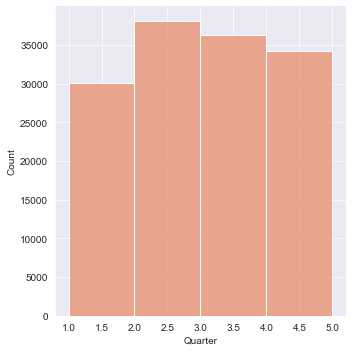

In [51]:
sns.displot(df, x ="Quarter", bins=[ 1, 2, 3, 4,5] )

Přijímání zvířat z hlediska počtu dosáhlo vrcholu ve druhém čtvrtletí. Další na řadě je třetí čtvrtletí. Tato období nastávají na jaře a v létě. Nejmenší počty jsou zaznamenány v prvním čtvrtletí.
    Mohu tedy říci, že mezi těmito obdobími je rozdíl v zátěži.

**❓ Vlastní otázky** 

1. Kdo má v útulku větší šanci na adopci  kočky nebo psy? Má  jejich pohlaví na to vliv?

Používám předem připravený  **big_df**, ze kterého vybírám pouze kočky a psy.

In [52]:
cats_dogs= big_df[(big_df['Animal Type'] == 'Dog') | (big_df['Animal Type'] == 'Cat') ]

Na základě nového df sestavte histogram, kde barva bude označovat, zda je zvíře adoptované, nebo ne.

C:\Users\user\AppData\Local\Temp\ipykernel_14140\4048951049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cats_dogs['Animal Type'] = cats_dogs['Animal Type'].cat.remove_unused_categories()


<AxesSubplot:xlabel='Animal Type', ylabel='Percent'>

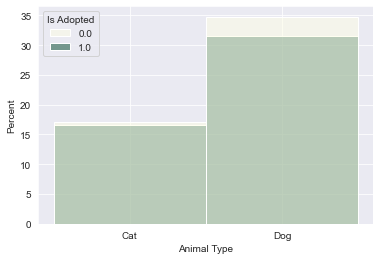

In [53]:
# del categories that are unusable
cats_dogs['Animal Type'] = cats_dogs['Animal Type'].cat.remove_unused_categories()

sns.histplot(data=cats_dogs, x='Animal Type', hue="Is Adopted", stat='percent', palette='YlGn')
# sns.histplot(data=cats_dogs, x='Animal Type', hue="Is Adopted", stat='probability' )

U koček je parita mezi adoptovanými a neadoptovanými, zatímco u psů je méně adopcí než neadopcí. Z kvantitativního hlediska vítězí psi, kteří tvoří 30 procent všech adopcí.  

Abych pochopil, jak pohlaví ovlivňuje rozhodnutí o adopci, rozdělil jsem sloupcový graf podle pohlaví.

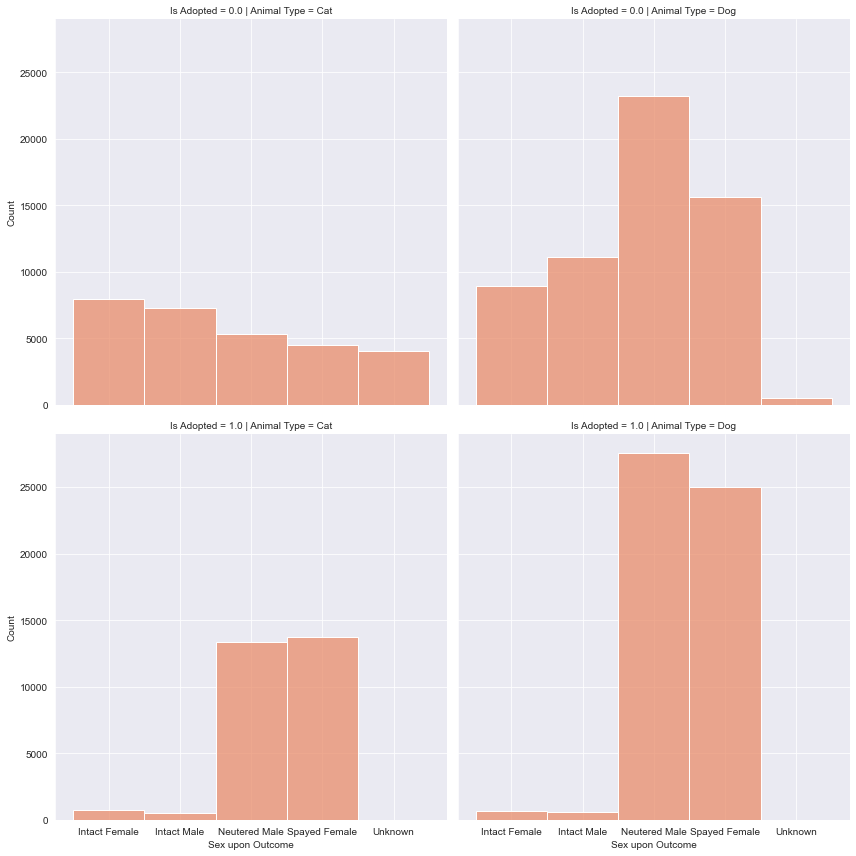

In [54]:
# create FaceGrid 
g = sns.FacetGrid(cats_dogs, col='Animal Type', row="Is Adopted", height=6)
g.map_dataframe(sns.histplot, x="Sex upon Outcome")

Mezi psy a kočkami jsou téměř vždy vybíráni převážně Neutred male a female. U psů jsou o něco častěji adoptováni samci než samice, u koček je parita. Je také vidět, že poptávka po kastrovaných kočkách je velmi vysoká, protože jich v útulku zůstává méně než běžných koček.

2. Který typ zvířete je více nemocný nebo zraněný, jaké je jeho pohlaví?

Odstraním zbytečné stavy.

C:\Users\user\AppData\Local\Temp\ipykernel_14140\3799429589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_n["Intake Condition"] = without_n["Intake Condition"].cat.remove_unused_categories()


<AxesSubplot:xlabel='Intake Condition', ylabel='count'>

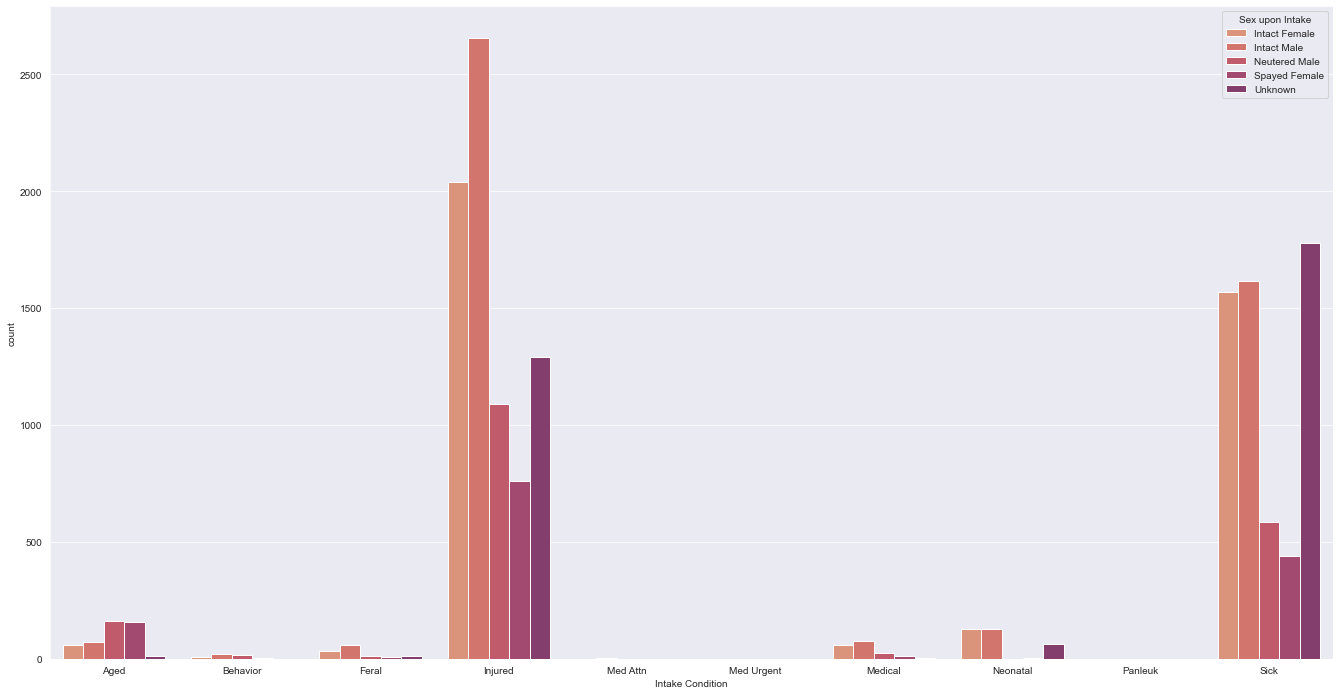

In [55]:
without_n = df[(df["Intake Condition"] != "Normal") & (df["Intake Condition"] != "Nursing") & (df["Intake Condition"] != "Pregnant") & (df["Intake Condition"] != "Other") & (df["Intake Condition"] != "Space")]

# del all empty categories
without_n["Intake Condition"] = without_n["Intake Condition"].cat.remove_unused_categories()

fig = plt.figure()
ax1 = fig.add_subplot(111)
fig.set_size_inches(23, 12)

sns.countplot(data=without_n, hue="Sex upon Intake" ,x="Intake Condition" ,  ax=ax1)

Vypadá to, že nejvíce zranění utrpěla nekastrovaná zvířata, z nichž nejvíce zranění utrpěli samci, což také naznačuje, že nekastrovaná zvířata mohou být aktivnější (a tedy více zranění), stejná korelace platí pro nemocná zvířata,ale mezi male a female je parita, zatímco kastrovaná zvířata jsou méně nemocná. Tyto korelace potvrzují, že v kategorii starších zvířat převažují kastrovaná zvířata. 

3. Jak dlouho zůstává zvíře v útulku, zjistěte průměrnou dobu umístění?

Nejprve zjistím dobu odečtením datumu odletu od datumu příletu a pro nová data zjistím medián, kvantily, maximum a minimum.

In [56]:
res_col = big_df["MonthYear_y"] - big_df["MonthYear_x"]
big_df.loc[res_col > "0 days", "Time in a shelter"] = res_col[res_col > "0 days"]
n_ddf= big_df.loc[big_df["Time in a shelter"]  > "0 days"]

display(n_ddf["Time in a shelter"].median())
n_ddf["Time in a shelter"].describe()

Timedelta('31 days 00:00:00')

count                          64284
mean     150 days 20:44:38.663431024
std      287 days 18:48:54.864141060
min                 28 days 00:00:00
25%                 31 days 00:00:00
50%                 31 days 00:00:00
75%                121 days 00:00:00
max               2950 days 00:00:00
Name: Time in a shelter, dtype: object

Už teď vám můžeme říct, že většina zvířat je v útulku 31 dní. Vzhledem k tomu, že data mají velký rozptyl a mnoho jedinečných hodnot, rozdělím je do podskupin po 15-20 dnech.

In [57]:
n_ddf.loc[n_ddf["Time in a shelter"]  < "20 days", "Time in a shelter group" ] = 15
n_ddf.loc[(n_ddf["Time in a shelter"]  > "19 days") &(n_ddf["Time in a shelter"]  < "30 days"), "Time in a shelter group" ] = 25
n_ddf.loc[(n_ddf["Time in a shelter"]  > "29 days") &(n_ddf["Time in a shelter"]  < "40 days"), "Time in a shelter group" ] = 35
n_ddf.loc[(n_ddf["Time in a shelter"]  > "39 days") &(n_ddf["Time in a shelter"]  < "50 days"), "Time in a shelter group" ] = 45
n_ddf.loc[(n_ddf["Time in a shelter"]  > "49 days") &(n_ddf["Time in a shelter"]  < "70 days"), "Time in a shelter group" ] = 60
n_ddf.loc[(n_ddf["Time in a shelter"]  > "69 days") &(n_ddf["Time in a shelter"]  < "90 days"), "Time in a shelter group" ] = 70
n_ddf.loc[(n_ddf["Time in a shelter"]  > "89 days") &(n_ddf["Time in a shelter"]  < "110 days"), "Time in a shelter group" ] = 90
n_ddf.loc[(n_ddf["Time in a shelter"]  > "109 days") &(n_ddf["Time in a shelter"]  < "130 days"), "Time in a shelter group" ] = 120
n_ddf.loc[(n_ddf["Time in a shelter"]  > "129 days"), "Time in a shelter group" ] = 130
n_ddf["Time in a shelter group"].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_14140\3331323686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_ddf.loc[n_ddf["Time in a shelter"]  < "20 days", "Time in a shelter group" ] = 15


array([ 35., 120.,  70.,  60., 130.,  25.,  90.])

<AxesSubplot:xlabel='Time in a shelter group', ylabel='Density'>

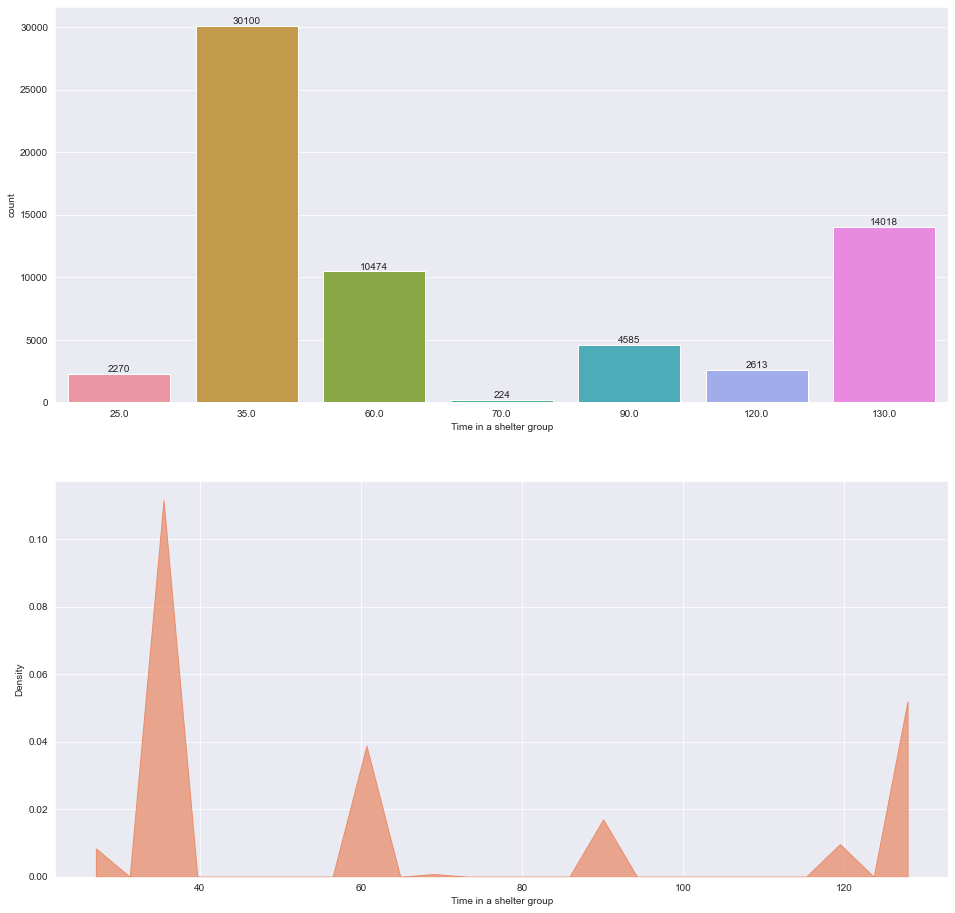

In [58]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(16,16))

pl = sns.countplot(data=n_ddf, x="Time in a shelter group", ax=ax1 )
pl.bar_label(pl.containers[0])
sns.histplot(data=n_ddf, x="Time in a shelter group", stat='density', element="poly", ax=ax2)

Můžeme říci, že skutečně průměrná doba držení v útulku je 30 dní, v tomto bodě vidíme v grafu velký vrchol, velký počet zvířat je držen od 55 do 65 dní, stejně jako velká skupina více než 130 dní.  